# 🌳 Decision Tree vs 🌐 SVM: Classification Boundary Visualization
In this notebook, you'll explore how Decision Trees and SVMs form decision boundaries using real-world data (Iris dataset).

- We use only two classes and two features for easy 2D visualization.
- You can change model parameters and observe how the decision boundary changes.

In [1]:
# 📦 Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

In [2]:
# 🔢 Load the Iris dataset (only two classes and two features)
iris = load_iris()
X = iris.data[:, [0, 2]]  # use sepal length and petal length
y = iris.target

# Only use class 0 and 1 for binary classification
X = X[y != 2]
y = y[y != 2]

In [3]:
# 📏 Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# 📊 Helper function to plot decision boundaries
def plot_decision_boundary(clf, X, y, ax, title):
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ['#FF0000', '#0000FF']

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
    for i, color in zip(np.unique(y), cmap_bold):
        idx = np.where(y == i)
        ax.scatter(X[idx, 0], X[idx, 1], c=color, label=f"Class {i}", edgecolor='k', s=30)
    ax.set_title(title)
    ax.legend()

In [5]:
# 🌳 Train Decision Tree and SVM classifiers
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_scaled, y)

svm = SVC(kernel='rbf', C=1)
svm.fit(X_scaled, y)

SVC(C=1)

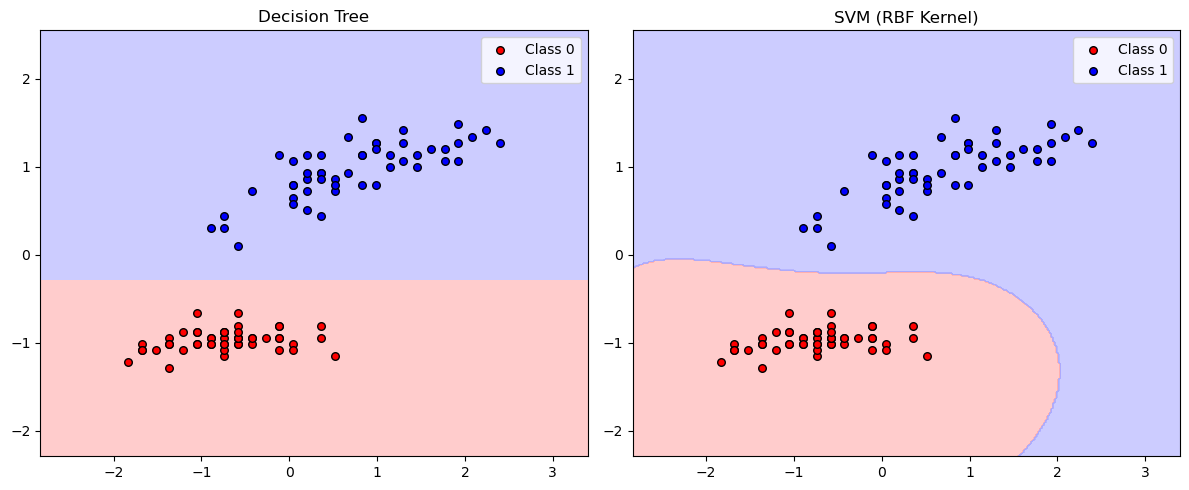

In [6]:
# 🖼️ Visualize decision boundaries
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_decision_boundary(tree, X_scaled, y, axes[0], "Decision Tree")
plot_decision_boundary(svm, X_scaled, y, axes[1], "SVM (RBF Kernel)")
plt.tight_layout()
plt.show()